In [35]:
import pandas as pd
import numpy as np
from snownlp import SnowNLP
import time
import datetime
import json
from PIL import Image
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim import corpora, models
import csv
from sklearn.feature_extraction.text import  CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.feature_extraction.text import  TfidfVectorizer
import matplotlib.pyplot as plt
import re
import jieba

In [36]:
datav1 = pd.read_excel("data.xlsx")
datav1['year'] = datav1['date'].apply(lambda x:int(x[0:4]))
datav1['month'] = datav1['date'].apply(lambda x:int(x[5:7]))
#print(datav1['year'])
datav1['date'] = pd.to_datetime(datav1['date'])
datav1

,date,content,year,month
0,2022-01-23 21:00:00,救大命🆘 被隔离在家，来送物资的社区志愿者竟然是前男友,2022,1
1,2022-01-23 21:00:00,求b占up主推荐,2022,1
2,2022-01-23 21:00:00,希望延迟开学(别骂我,2022,1
3,2022-01-23 21:00:00,求求学校领导加强宣传吧……今天竟然和一个华科的同学争，人大到底是不是第二梯队😢,2022,1
4,2022-01-23 21:00:00,无大语，我爸觉得只要坐在电脑前就是在玩电脑，可是我是学计算机的呀😅,2022,1
...,...,...,...,...
4188,2022-01-31 21:00:00,想试着考年后的教资，年后复习来的急吗,2022,1
4189,2022-01-31 21:00:00,你觉得仪式感有必要吗？,2022,1
4190,2022-01-31 21:00:00,一想到马上要给导师发新年祝福就紧张,2022,1
4191,2022-01-31 21:00:00,蓓思的电容笔真的好用吗？跟ap比起来哪个性价比更高？,2022,1


In [37]:
datav2 = datav1[datav1.year == 2022]
datav2.dropna(inplace=True)
datav2.sort_values(by='date',inplace=True)
datav2.drop_duplicates(inplace=True)
datav2

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,date,content,year,month
3413,2022-01-02 21:00:00,姐妹们是什么罩杯？,2022,1
3403,2022-01-02 21:00:00,这两天就总是挥之不去的想法，可能是看到了高中现在在清北的同学他们好快乐啊，我总告诉自己人大也...,2022,1
3404,2022-01-02 21:00:00,求问高仰光老师的外国法制史怎么复习，是复习他发的PPT还是他上课讲的PPT呀？感觉他发出来的...,2022,1
3405,2022-01-02 21:00:00,秦聪老师真的超级无敌好！,2022,1
3406,2022-01-02 21:00:00,请问下学期转专业的话这学期期末考试考得很差影响大吗？谢谢🙏,2022,1
...,...,...,...,...
1108,2022-05-11 18:57:00,想知道校内理发店自带染发剂不漂发染发需要收多少的手工费,2022,5
1118,2022-05-11 18:57:00,啊，纯爱战士暴怒💢，NTR达咩！,2022,5
1081,2022-05-11 18:57:00,想问问大学生心理健康期末闭卷怎么考捏。老师不发ppt,2022,5
2576,2022-05-13 23:26:00,参与方式,2022,5


In [38]:
stopwordlist = []
with open(r"stopwords.txt",'r',encoding="UTF-8") as f:
    for i in f:
        stopwordlist.append(i.strip())
#print(stopwordlist)

In [39]:
def sent2word(line):
    segList = jieba.cut(line,cut_all=False)
    segSentence = ''
    for word in segList:
        if word in stopwordlist:
            continue
        if word != '\t' and len(word)>1:
            segSentence += word + " "
    return segSentence.strip()
datav2['words'] = datav2['content'].apply(sent2word)
datav2.dropna(axis=0,how='any',inplace=True)
datav2.to_csv('datav2.csv')
datav2

C:\Users\DELL\AppData\Local\Temp/ipykernel_23164/2892016201.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datav2['words'] = datav2['content'].apply(sent2word)
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,date,content,year,month,words
3413,2022-01-02 21:00:00,姐妹们是什么罩杯？,2022,1,姐妹 罩杯
3403,2022-01-02 21:00:00,这两天就总是挥之不去的想法，可能是看到了高中现在在清北的同学他们好快乐啊，我总告诉自己人大也...,2022,1,两天 挥之不去 高中 清北 同学 快乐 告诉 人大 不差 毕业 落户 北京 体育课 资源 设...
3404,2022-01-02 21:00:00,求问高仰光老师的外国法制史怎么复习，是复习他发的PPT还是他上课讲的PPT呀？感觉他发出来的...,2022,1,求问 仰光 老师 外国 法制史 复习 复习 他发 PPT 上课 PPT 发出 PPT 删减 ...
3405,2022-01-02 21:00:00,秦聪老师真的超级无敌好！,2022,1,秦聪 老师 超级 无敌
3406,2022-01-02 21:00:00,请问下学期转专业的话这学期期末考试考得很差影响大吗？谢谢🙏,2022,1,下学期 专业 学期 期末考试 考得 影响 谢谢
...,...,...,...,...,...
1108,2022-05-11 18:57:00,想知道校内理发店自带染发剂不漂发染发需要收多少的手工费,2022,5,校内 理发店 自带 染发剂 漂发 染发 手工费
1118,2022-05-11 18:57:00,啊，纯爱战士暴怒💢，NTR达咩！,2022,5,纯爱 战士 暴怒 NTR
1081,2022-05-11 18:57:00,想问问大学生心理健康期末闭卷怎么考捏。老师不发ppt,2022,5,问问 大学生 心理健康 期末 闭卷 考捏 老师 不发 ppt
2576,2022-05-13 23:26:00,参与方式,2022,5,参与 方式


#### 词频
#### 词云
#### 聚类
#### LDA/topic

In [40]:
key_words = ['疫情', '病例','审批','封校','核酸','返校','离京','新冠','防控']
key_ls = []
dict = {}
words = datav2['words'].apply(lambda x:jieba.cut(x,cut_all=False))
for line in words:
    flag = 0
    for word in line:
        if word in dict.keys():
            dict[word]=dict[word]+1
        else:
            dict[word]=1
        if word in key_words:
            flag = 1
    if flag:
        key_ls.append(1)
    else:
        key_ls.append(0)
w_order=sorted(dict.items(),key=lambda x:x[1],reverse=True)    
datav2['covid']=key_ls

w_order10=w_order[:10]#将列表的前十位提取并且遍历 输出key(单词)和values(次数)
for key,values in w_order10:
    print(key,':',values)     

  : 19527
老师 : 170
喜欢 : 169
人大 : 151
学校 : 146
同学 : 122
男生 : 104
推荐 : 103
朋友 : 99
uu : 92


C:\Users\DELL\AppData\Local\Temp/ipykernel_23164/2882471821.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datav2['covid']=key_ls


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:492: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead

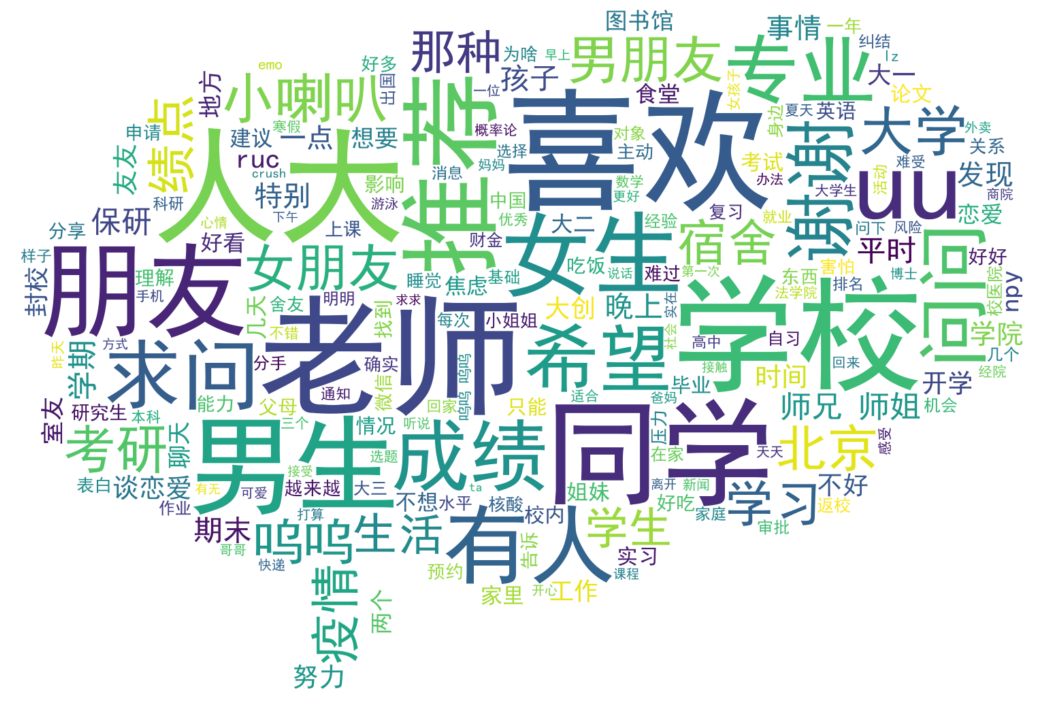

<Figure size 432x288 with 0 Axes>

In [41]:
words = list(datav2['words'])
text = ' '.join(words)
test_mask = np.array(Image.open('./mask.jpg'))
stopwords = set(STOPWORDS)
stopwords.add("said")

#cloud_words
wc = WordCloud(background_color="white", max_words=200, mask=test_mask,font_path='simhei.ttf',
        stopwords=stopwords)
# generate word cloud
wc.generate(text)
 
# plot and show
plt.figure(figsize=(19.6,12.8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()
 
# store to file
wc.to_file("test.png")

In [42]:
# 该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer = CountVectorizer(max_features=20000)
# 该类会统计每个词语的tf-idf权值
tf_idf_transformer = TfidfTransformer()
# 将文本转为词频矩阵并计算tf-idf
tfidf = tf_idf_transformer.fit_transform(vectorizer.fit_transform(datav2['words']))
# 获取词袋模型中的所有词语
tfidf_matrix = tfidf.toarray()
# 获取词袋模型中的所有词语
word = vectorizer.get_feature_names()
#print(word)

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
from sklearn.cluster import KMeans
num_clusters = 10
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf)

clusters = km.labels_.tolist()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
print(vectorizer.get_stop_words())
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

None
Cluster 0: uu 小喇叭 有人 朋友 同学 成绩 求问 绩点 专业 北京
Cluster 1: 老师 平时 求问 期末 会捞 出分 学生 同学 概率论 作业
Cluster 2: 喜欢 男生 女生 谈恋爱 主动 女孩子 朋友 聊天 恋爱 姐姐
Cluster 3: 推荐 好吃 好看 电影 课程 自学 方法 国产 夏天 uu
Cluster 4: 问问 中国 经济 街巷 文化 考研 uu 研究生 赏析 师姐
Cluster 5: 女朋友 npy 财金 找个 找到 听说 21 哥哥 可冲 生气
Cluster 6: 开学 别骂 延迟 推迟 在家 返校 emo 有人 希望 回京
Cluster 7: 人大 同学 项目 专业 朋友 本科 标兵 睡觉 考研 复旦
Cluster 8: 学校 疫情 病例 审批 呜呜 学生 uu 地方 同学 核酸
Cluster 9: ruc emo 思享 普通人 食堂 不能不要 地方 传播 午课 疯话


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [44]:
datav2.dropna(inplace = True)
datav2['words'].to_csv('ouput.csv',index=False,header=0)

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [45]:
PATH = "ouput.csv"
 
file_object2=open(PATH,encoding = 'utf-8',errors = 'ignore').read().split('\n')  #一行行的读取内容
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
#print(data_set)
dictionary = corpora.Dictionary(data_set)  # 构建 document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
 
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes = 10,random_state=1)
topic_list=lda.print_topics()
print(topic_list)
 
result_list =[]
for i in lda.get_document_topics(corpus)[:]:
    listj=[]
    for j in i:
        listj.append(j[1])
    bz=listj.index(max(listj))
    result_list.append(i[bz][0])
#print(result_list)
for topic in lda.print_topics(num_topics=10):
    termNumber = topic[0]
    print(topic[0], ':', sep='')
    listOfTerms = topic[1].split('+')
    for term in listOfTerms:
        listItems = term.split('*')
        print('  ', listItems[1], '(', listItems[0], ')', sep='')
datav2['result'] = result_list[:-1]
datav2

[(0, '0.018*"孩子" + 0.010*"绩点" + 0.007*"商院" + 0.007*"考试" + 0.006*"大一" + 0.006*"求问" + 0.006*"811" + 0.005*"室友" + 0.005*"保研" + 0.005*"越来越"'), (1, '0.012*"学校" + 0.011*"同学" + 0.008*"老师" + 0.008*"校内" + 0.008*"uu" + 0.006*"推荐" + 0.006*"评论" + 0.006*"有人" + 0.006*"外卖" + 0.005*"问问"'), (2, '0.011*"老师" + 0.010*"师姐" + 0.009*"师兄" + 0.009*"选题" + 0.009*"学生" + 0.007*"大创" + 0.006*"学校" + 0.006*"男朋友" + 0.006*"论文" + 0.005*"五一"'), (3, '0.019*"春假" + 0.017*"不想" + 0.015*"北京" + 0.008*"生活" + 0.007*"同学" + 0.006*"学校" + 0.005*"一个月" + 0.005*"就业" + 0.005*"长城" + 0.005*"舍友"'), (4, '0.023*"男生" + 0.020*"喜欢" + 0.013*"女生" + 0.007*"活动" + 0.007*"uu" + 0.006*"学院" + 0.006*"人大" + 0.006*"经验" + 0.006*"npy" + 0.005*"主动"'), (5, '0.016*"男生" + 0.011*"谈恋爱" + 0.009*"小喇叭" + 0.008*"女生" + 0.007*"爱情" + 0.006*"一位" + 0.006*"呜呜" + 0.006*"男朋友" + 0.006*"希望" + 0.005*"对象"'), (6, '0.032*"喜欢" + 0.011*"朋友" + 0.007*"人大" + 0.006*"微信" + 0.005*"考研" + 0.005*"那种" + 0.005*"经济学" + 0.005*"关系" + 0.005*"希望" + 0.005*"推荐"'), (7, '0.021*"学校" + 0.014*"人大" + 0.012*"

C:\Users\DELL\AppData\Local\Temp/ipykernel_23164/530438176.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datav2['result'] = result_list[:-1]


,date,content,year,month,words,covid,result
3413,2022-01-02 21:00:00,姐妹们是什么罩杯？,2022,1,姐妹 罩杯,0,6
3403,2022-01-02 21:00:00,这两天就总是挥之不去的想法，可能是看到了高中现在在清北的同学他们好快乐啊，我总告诉自己人大也...,2022,1,两天 挥之不去 高中 清北 同学 快乐 告诉 人大 不差 毕业 落户 北京 体育课 资源 设...,0,8
3404,2022-01-02 21:00:00,求问高仰光老师的外国法制史怎么复习，是复习他发的PPT还是他上课讲的PPT呀？感觉他发出来的...,2022,1,求问 仰光 老师 外国 法制史 复习 复习 他发 PPT 上课 PPT 发出 PPT 删减 ...,0,4
3405,2022-01-02 21:00:00,秦聪老师真的超级无敌好！,2022,1,秦聪 老师 超级 无敌,0,4
3406,2022-01-02 21:00:00,请问下学期转专业的话这学期期末考试考得很差影响大吗？谢谢🙏,2022,1,下学期 专业 学期 期末考试 考得 影响 谢谢,0,8
...,...,...,...,...,...,...,...
1108,2022-05-11 18:57:00,想知道校内理发店自带染发剂不漂发染发需要收多少的手工费,2022,5,校内 理发店 自带 染发剂 漂发 染发 手工费,0,3
1118,2022-05-11 18:57:00,啊，纯爱战士暴怒💢，NTR达咩！,2022,5,纯爱 战士 暴怒 NTR,0,9
1081,2022-05-11 18:57:00,想问问大学生心理健康期末闭卷怎么考捏。老师不发ppt,2022,5,问问 大学生 心理健康 期末 闭卷 考捏 老师 不发 ppt,0,9
2576,2022-05-13 23:26:00,参与方式,2022,5,参与 方式,0,1


In [46]:
from pyLDAvis import gensim
import pyLDAvis
pyLDAvis.enable_notebook()

'''
lda: 计算好的话题模型

corpus: 文档词频矩阵

dictionary: 词语空间
'''
d = gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(d)
pyLDAvis.save_html(d, 'lda.html')

c:\Program Files\Python39\lib\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


In [47]:
df1 = datav2.groupby('month').count()
df1

,date,content,year,words,covid,result
month,,,,,,
1,610,610,610,610,610,610
2,398,398,398,398,398,398
3,684,684,684,684,684,684
4,658,658,658,658,658,658
5,108,108,108,108,108,108


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

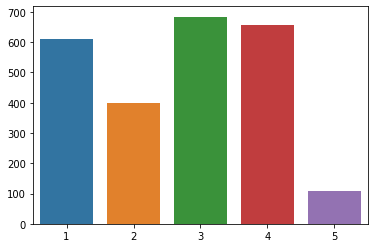

In [48]:
import seaborn as sns
month = [1,2,3,4,5]
num = [610,398,684,658,108]
sns.barplot(month,num)

##### 时间序列做吧

Text(0.5, 1.0, 'month_all')

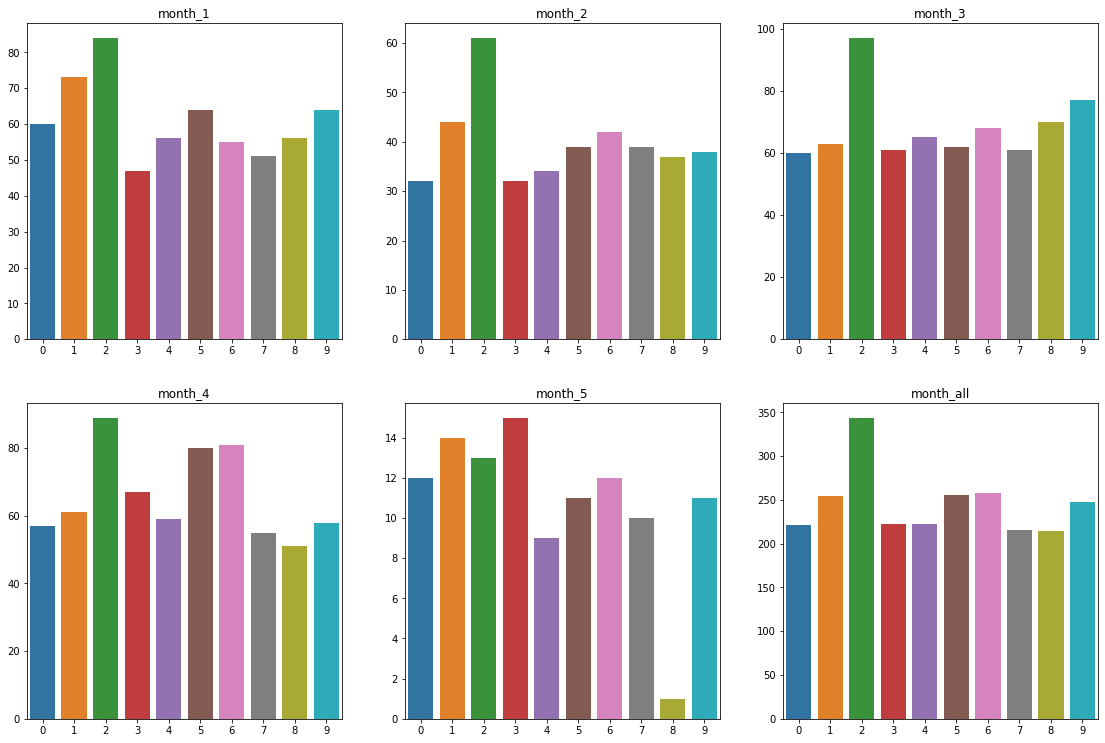

In [49]:
fig,ax = plt.subplots(2,3,figsize = (19.2, 12.8))
ax1 = sns.barplot(y=datav2[datav2.month==1]['result'].value_counts().values, x=datav2[datav2.month==1]['result'].value_counts().index,ax = ax[0][0])
ax2 = sns.barplot(y=datav2[datav2.month==2]['result'].value_counts().values, x=datav2[datav2.month==2]['result'].value_counts().index,ax = ax[0][1])
ax3 = sns.barplot(y=datav2[datav2.month==3]['result'].value_counts().values, x=datav2[datav2.month==3]['result'].value_counts().index,ax = ax[0][2])
ax4 = sns.barplot(y=datav2[datav2.month==4]['result'].value_counts().values, x=datav2[datav2.month==4]['result'].value_counts().index,ax = ax[1][0])
ax5 = sns.barplot(y=datav2[datav2.month==5]['result'].value_counts().values, x=datav2[datav2.month==5]['result'].value_counts().index,ax = ax[1][1])
ax6 = sns.barplot(y=datav2['result'].value_counts().values, x=datav2['result'].value_counts().index,ax = ax[1][2])
ax1.set_title('month_1')
ax2.set_title('month_2')
ax3.set_title('month_3')
ax4.set_title('month_4')
ax5.set_title('month_5')
ax6.set_title('month_all')

##### month_1

In [50]:
for i in range(1,6):
    print('month'+str(i))
    df = datav2[datav2.month==i]
    PATH = 'ouput_month+'+str(i)+'.csv'
    df['words'].to_csv('ouput.csv',index=False,header=0)

month1
month2
month3
month4
month5


In [51]:
PATH = 'ouput_month+'+str(1)+'.csv'
file_object2=open(PATH,encoding = 'utf-8',errors = 'ignore').read().split('\n')  #一行行的读取内容
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
#print(data_set)
dictionary = corpora.Dictionary(data_set)  # 构建 document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
 
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes = 30,random_state=1)
topic_list=lda.print_topics()
print(topic_list)
 
result_list =[]
for i in lda.get_document_topics(corpus)[:]:
    listj=[]
    for j in i:
        listj.append(j[1])
    bz=listj.index(max(listj))
    result_list.append(i[bz][0])
#print(result_list)
for topic in lda.print_topics(num_topics=10):
    termNumber = topic[0]
    print(topic[0], ':', sep='')
    listOfTerms = topic[1].split('+')
    for term in listOfTerms:
        listItems = term.split('*')
        print('  ', listItems[1], '(', listItems[0], ')', sep='')

d = gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(d)
pyLDAvis.save_html(d, 'lda_month'+str(1)+'.html')        

[(0, '0.009*"难受" + 0.007*"老师" + 0.006*"工作" + 0.006*"考研" + 0.006*"出国" + 0.006*"父母" + 0.005*"学生" + 0.005*"呜呜" + 0.005*"复习" + 0.005*"规矩"'), (1, '0.010*"老师" + 0.009*"真的" + 0.009*"希望" + 0.009*"人大" + 0.009*"成绩" + 0.007*"绩点" + 0.007*"有没有" + 0.006*"推荐" + 0.006*"学校" + 0.005*"建议"'), (2, '0.009*"平时" + 0.009*"真的" + 0.007*"喜欢" + 0.007*"推荐" + 0.005*"老师" + 0.005*"有人" + 0.005*"成绩" + 0.005*"保研" + 0.005*"期末" + 0.005*"作业"'), (3, '0.021*"真的" + 0.014*"喜欢" + 0.013*"人大" + 0.012*"呜呜" + 0.011*"老师" + 0.006*"法学院" + 0.005*"请问" + 0.005*"有没有" + 0.005*"寒假" + 0.005*"同学"'), (4, '0.009*"npy" + 0.008*"绩点" + 0.008*"视频" + 0.006*"学期" + 0.006*"问问" + 0.006*"研究生" + 0.006*"在家" + 0.006*"老师" + 0.006*"男朋友" + 0.005*"期末"'), (5, '0.010*"女朋友" + 0.010*"老师" + 0.008*"推荐" + 0.008*"喜欢" + 0.008*"真的" + 0.007*"朋友" + 0.007*"前女友" + 0.006*"考研" + 0.006*"有没有" + 0.006*"求问"'), (6, '0.011*"真的" + 0.006*"概率论" + 0.006*"学习" + 0.005*"大学" + 0.005*"同学" + 0.005*"位置" + 0.005*"在家" + 0.005*"女性" + 0.005*"绩点" + 0.005*"选题"'), (7, '0.027*"真的" + 0.016*"老师" + 0.015*

c:\Program Files\Python39\lib\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


In [52]:
PATH = 'ouput_month+'+str(2)+'.csv'
file_object2=open(PATH,encoding = 'utf-8',errors = 'ignore').read().split('\n')  #一行行的读取内容
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
#print(data_set)
dictionary = corpora.Dictionary(data_set)  # 构建 document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
 
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes = 30,random_state=1)
topic_list=lda.print_topics()
print(topic_list)
 
result_list =[]
for i in lda.get_document_topics(corpus)[:]:
    listj=[]
    for j in i:
        listj.append(j[1])
    bz=listj.index(max(listj))
    result_list.append(i[bz][0])
#print(result_list)
for topic in lda.print_topics(num_topics=10):
    termNumber = topic[0]
    print(topic[0], ':', sep='')
    listOfTerms = topic[1].split('+')
    for term in listOfTerms:
        listItems = term.split('*')
        print('  ', listItems[1], '(', listItems[0], ')', sep='')

d = gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(d)
pyLDAvis.save_html(d, 'lda_month'+str(2)+'.html')        

[(0, '0.016*"学校" + 0.011*"家里" + 0.009*"女生" + 0.009*"喜欢" + 0.007*"返校" + 0.007*"外婆" + 0.007*"请问" + 0.005*"uu" + 0.005*"北京" + 0.005*"问下"'), (1, '0.015*"预约" + 0.014*"谢谢" + 0.014*"开学" + 0.010*"友友" + 0.009*"人大" + 0.009*"请问" + 0.008*"生活" + 0.008*"uu" + 0.006*"真的" + 0.006*"感觉"'), (2, '0.012*"绩点" + 0.012*"有人" + 0.012*"宿舍" + 0.009*"求问" + 0.009*"喜欢" + 0.006*"开学" + 0.006*"印象" + 0.006*"肥肠" + 0.006*"人大" + 0.006*"基础"'), (3, '0.011*"有没有" + 0.011*"推荐" + 0.011*"同学" + 0.011*"学校" + 0.009*"师兄" + 0.009*"师姐" + 0.007*"人大" + 0.007*"学期" + 0.007*"英语" + 0.007*"北京"'), (4, '0.011*"真的" + 0.011*"老师" + 0.009*"研究生" + 0.009*"朋友" + 0.009*"纠结" + 0.006*"一年" + 0.006*"结项" + 0.006*"学校" + 0.004*"北京" + 0.004*"那种"'), (5, '0.012*"人大" + 0.012*"学校" + 0.010*"同学" + 0.010*"专业" + 0.010*"朋友" + 0.010*"实习" + 0.008*"证明" + 0.008*"呜呜" + 0.008*"数学" + 0.006*"论文"'), (6, '0.014*"uu" + 0.008*"寒假" + 0.008*"辅修" + 0.008*"学校" + 0.006*"中国" + 0.006*"返校" + 0.006*"街巷" + 0.006*"申请" + 0.006*"专业" + 0.006*"提前"'), (7, '0.010*"人大" + 0.010*"呜呜" + 0.010*"成绩" + 0

In [53]:
PATH = 'ouput_month+'+str(3)+'.csv'
file_object2=open(PATH,encoding = 'utf-8',errors = 'ignore').read().split('\n')  #一行行的读取内容
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
#print(data_set)
dictionary = corpora.Dictionary(data_set)  # 构建 document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
 
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes = 30,random_state=1)
topic_list=lda.print_topics()
print(topic_list)
 
result_list =[]
for i in lda.get_document_topics(corpus)[:]:
    listj=[]
    for j in i:
        listj.append(j[1])
    bz=listj.index(max(listj))
    result_list.append(i[bz][0])
#print(result_list)
for topic in lda.print_topics(num_topics=10):
    termNumber = topic[0]
    print(topic[0], ':', sep='')
    listOfTerms = topic[1].split('+')
    for term in listOfTerms:
        listItems = term.split('*')
        print('  ', listItems[1], '(', listItems[0], ')', sep='')

d = gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(d)
pyLDAvis.save_html(d, 'lda_month'+str(3)+'.html')        

[(0, '0.012*"感觉" + 0.010*"封校" + 0.009*"学校" + 0.009*"同学" + 0.005*"真的" + 0.005*"一点" + 0.005*"宿舍" + 0.005*"请问" + 0.004*"好多" + 0.004*"孩子"'), (1, '0.010*"老师" + 0.008*"同学" + 0.008*"求问" + 0.007*"北京" + 0.007*"推荐" + 0.007*"学校" + 0.005*"请问" + 0.005*"有人" + 0.005*"宿舍" + 0.005*"审批"'), (2, '0.010*"真的" + 0.009*"疫情" + 0.006*"学校" + 0.006*"出入" + 0.005*"喜欢" + 0.005*"审批" + 0.005*"求问" + 0.005*"时间" + 0.005*"有没有" + 0.005*"师姐"'), (3, '0.011*"感觉" + 0.010*"老师" + 0.009*"同学" + 0.008*"人大" + 0.008*"真的" + 0.006*"谢谢" + 0.006*"时间" + 0.005*"ruc" + 0.005*"学校" + 0.005*"呜呜"'), (4, '0.016*"学校" + 0.013*"疫情" + 0.009*"请问" + 0.005*"uu" + 0.005*"食堂" + 0.005*"审批" + 0.005*"预约" + 0.004*"封校" + 0.004*"有没有" + 0.004*"游泳"'), (5, '0.015*"女生" + 0.013*"男生" + 0.007*"有没有" + 0.007*"真的" + 0.006*"人大" + 0.006*"感觉" + 0.004*"有人" + 0.004*"事情" + 0.004*"说话" + 0.004*"鸳鸯"'), (6, '0.022*"喜欢" + 0.010*"奶奶" + 0.009*"人大" + 0.006*"朋友" + 0.006*"萝卜" + 0.006*"回来" + 0.004*"呜呜" + 0.004*"几个" + 0.004*"多人" + 0.004*"好看"'), (7, '0.007*"女生" + 0.007*"通知" + 0.007*"出轨" +

In [54]:
PATH = 'ouput_month+'+str(4)+'.csv'
file_object2=open(PATH,encoding = 'utf-8',errors = 'ignore').read().split('\n')  #一行行的读取内容
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
#print(data_set)
dictionary = corpora.Dictionary(data_set)  # 构建 document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
 
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes = 30,random_state=1)
topic_list=lda.print_topics()
print(topic_list)
 
result_list =[]
for i in lda.get_document_topics(corpus)[:]:
    listj=[]
    for j in i:
        listj.append(j[1])
    bz=listj.index(max(listj))
    result_list.append(i[bz][0])
#print(result_list)
for topic in lda.print_topics(num_topics=10):
    termNumber = topic[0]
    print(topic[0], ':', sep='')
    listOfTerms = topic[1].split('+')
    for term in listOfTerms:
        listItems = term.split('*')
        print('  ', listItems[1], '(', listItems[0], ')', sep='')

d = gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(d)
pyLDAvis.save_html(d, 'lda_month'+str(4)+'.html')        

[(0, '0.013*"人大" + 0.006*"女朋友" + 0.006*"有人" + 0.006*"请问" + 0.005*"出去玩" + 0.005*"大创" + 0.003*"财金" + 0.003*"英语" + 0.003*"想法" + 0.003*"宿舍"'), (1, '0.008*"感觉" + 0.006*"男朋友" + 0.006*"有没有" + 0.006*"喜欢" + 0.006*"女性" + 0.004*"专业" + 0.004*"那种" + 0.004*"女生" + 0.004*"爱情" + 0.003*"自信"'), (2, '0.015*"感觉" + 0.012*"人大" + 0.006*"求问" + 0.006*"师姐" + 0.006*"真的" + 0.005*"推荐" + 0.005*"请问" + 0.005*"师兄" + 0.005*"喜欢" + 0.004*"男生"'), (3, '0.013*"喜欢" + 0.012*"男生" + 0.008*"朋友" + 0.007*"uu" + 0.006*"女生" + 0.006*"专业" + 0.006*"人大" + 0.005*"商院" + 0.005*"那种" + 0.005*"软科"'), (4, '0.023*"女生" + 0.019*"男生" + 0.018*"真的" + 0.015*"谈恋爱" + 0.014*"春假" + 0.014*"北京" + 0.012*"不想" + 0.011*"颜值" + 0.010*"能力" + 0.009*"我要"'), (5, '0.009*"真的" + 0.008*"感觉" + 0.007*"睡觉" + 0.006*"喜欢" + 0.006*"有没有" + 0.005*"好好" + 0.005*"朋友" + 0.004*"男生" + 0.004*"担心" + 0.004*"谢谢"'), (6, '0.025*"喜欢" + 0.017*"真的" + 0.007*"老师" + 0.006*"求问" + 0.005*"聊天" + 0.005*"师姐" + 0.005*"山东" + 0.004*"......" + 0.004*"谈恋爱" + 0.004*"主动"'), (7, '0.010*"感觉" + 0.008*"女朋友" + 0.00

In [55]:
PATH = 'ouput_month+'+str(5)+'.csv'
file_object2=open(PATH,encoding = 'utf-8',errors = 'ignore').read().split('\n')  #一行行的读取内容
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
#print(data_set)
dictionary = corpora.Dictionary(data_set)  # 构建 document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
 
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes = 30,random_state=1)
topic_list=lda.print_topics()
print(topic_list)
 
result_list =[]
for i in lda.get_document_topics(corpus)[:]:
    listj=[]
    for j in i:
        listj.append(j[1])
    bz=listj.index(max(listj))
    result_list.append(i[bz][0])
#print(result_list)
for topic in lda.print_topics(num_topics=10):
    termNumber = topic[0]
    print(topic[0], ':', sep='')
    listOfTerms = topic[1].split('+')
    for term in listOfTerms:
        listItems = term.split('*')
        print('  ', listItems[1], '(', listItems[0], ')', sep='')

d = gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(d)
pyLDAvis.save_html(d, 'lda_month'+str(5)+'.html')        

[(0, '0.016*"推荐" + 0.016*"水果" + 0.016*"戒指" + 0.008*"学校" + 0.008*"丢失" + 0.008*"校内" + 0.008*"好像" + 0.008*"封校" + 0.008*"哥哥" + 0.008*"室友"'), (1, '0.014*"人大" + 0.014*"专项" + 0.014*"希望" + 0.014*"呜呜" + 0.014*"问问" + 0.007*"上网" + 0.007*"老师" + 0.007*"图书馆" + 0.007*"好像" + 0.007*"室友"'), (2, '0.017*"问问" + 0.009*"校内" + 0.009*"评论" + 0.009*"学校" + 0.009*"理发店" + 0.009*"提交" + 0.009*"重嘛" + 0.009*"失主" + 0.009*"三星" + 0.009*"20.7%"'), (3, '0.020*"学校" + 0.020*"个人所得税" + 0.014*"利息" + 0.014*"股利" + 0.014*"中国" + 0.014*"不想" + 0.014*"实习" + 0.014*"厕所" + 0.007*"参加" + 0.007*"20%"'), (4, '0.015*"图书馆" + 0.015*"作业" + 0.015*"一篇" + 0.015*"预期" + 0.015*"接触" + 0.015*"中文版" + 0.015*"晚上" + 0.008*"期末" + 0.008*"线下" + 0.008*"黑色"'), (5, '0.018*"uu" + 0.018*"蛋糕" + 0.018*"爸爸" + 0.018*"机房" + 0.018*"占座" + 0.018*"下载" + 0.018*"数据" + 0.018*"有偿" + 0.018*"可加" + 0.018*"QQ"'), (6, '0.025*"上课" + 0.017*"周四" + 0.017*"有没有" + 0.017*"焦虑" + 0.017*"好好" + 0.017*"选题" + 0.009*"吃饭" + 0.009*"问问" + 0.009*"老师" + 0.009*"期末"'), (7, '0.021*"同学" + 0.016*"报名" + 0.01

##### 聚类试一试

In [56]:
from sklearn.cluster import KMeans
num_clusters = 10
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf)

clusters = km.labels_.tolist()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
print(vectorizer.get_stop_words())
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

None
Cluster 0: uu 有人 小喇叭 朋友 女生 男生 北京 同学 女朋友 男朋友
Cluster 1: 喜欢 男生 女生 主动 女孩子 聊天 朋友 谈恋爱 恋爱 姐姐
Cluster 2: 成绩 专业 谢谢 学生 建议 就业 同学 社科 努力 环境
Cluster 3: 老师 平时 求问 出分 期末 学生 同学 会捞 概率论 作业
Cluster 4: 学校 呜呜 病例 uu 地方 疫情 同学 三义 审批 学生
Cluster 5: 推荐 好吃 好看 电影 课程 自学 方法 国产 夏天 男士
Cluster 6: 绩点 核心 大一 排名 呜呜 20 辅修 成绩 法学院 焦虑
Cluster 7: 大一 论文 东西 每次 上学 位置 上绩 lz 一篇 时间
Cluster 8: 人大 同学 专业 朋友 标兵 考研 复旦 统院 北京 排名
Cluster 9: 求问 师姐 师兄 真诚 谢谢 孩子 问问 金融 实习 室友


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [57]:
for i in range(1,6):
    print('month'+str(i))
    df = datav2[datav2.month==i]
    # 该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文本下的词频
    vectorizer = CountVectorizer(max_features=20000)
    # 该类会统计每个词语的tf-idf权值
    tf_idf_transformer = TfidfTransformer()
    # 将文本转为词频矩阵并计算tf-idf
    tfidf = tf_idf_transformer.fit_transform(vectorizer.fit_transform(df['words']))
    # 获取词袋模型中的所有词语
    tfidf_matrix = tfidf.toarray()
    # 获取词袋模型中的所有词语
    word = vectorizer.get_feature_names()
    #print(word)
    num_clusters = 10
    km = KMeans(n_clusters=num_clusters)
    km.fit(tfidf)

    clusters = km.labels_.tolist()
    order_centroids = km.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    print(vectorizer.get_stop_words())
    for i in range(num_clusters):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

month1


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


None
Cluster 0: 喜欢 小喇叭 绩点 考研 学期 友友 哈哈哈哈 npy 朋友 同学
Cluster 1: 老师 出分 平时 求问 会捞 概率论 调分 呜呜 黄泽清 侯衍社
Cluster 2: 人大 师兄 晚上 师姐 实习 本科 四大 压线 专业 金融
Cluster 3: 为啥 速读 老师 数据 项敬尧 没出 思修 没差 87 率低
Cluster 4: 在家 隔离 npy 爸妈 睡懒觉 视频 救大命 前男友 社区 物资
Cluster 5: 成绩 期末 复习 保研 排名 难受 绩点 学期 努力 好多
Cluster 6: 希望 开学 女生 孩子 大二 uu 呜呜 大一 男生 新闻
Cluster 7: 学习 打扰 大学 媒体 睡觉 建议 难度 同学 老师 白天
Cluster 8: 推荐 好看 好吃 电影 国产 笔记本 课程 朋友 型号 剧荒
Cluster 9: 有人 干货 都行 欧阳 知识 英语考试 作弊 上学 一把 概率论
month2


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


None
Cluster 0: 开学 中国 专业 街巷 有人 学期 不想 大一 预约 论文
Cluster 1: 老师 魏楚 ensign 学生 平时 分好 web 曹魏 史纲 周家
Cluster 2: 北京 生源 广州 友友 快递 学校 深圳 普通话 户口 时数
Cluster 3: 朋友 成绩 喜欢 那种 男朋友 北大 论文 呼市 科目 努力
Cluster 4: 推荐 同学 平台 拜托 tope 二手电脑 人大 谢谢 零食 唇膏
Cluster 5: 学校 呜呜 家里 一年 研究生 谈恋爱 小姐姐 密码 帮忙 兼职
Cluster 6: 小喇叭 终于 yyds 哈哈哈 一卡 呜呜 回来 好久不见 嫌弃 那位
Cluster 7: 人大 绩点 组队 证明 求是 鹿大 王者 校内 辅修 总绩
Cluster 8: 保研 学工 科研 工作 加分 评价 科学 实验班 比例 多一些
Cluster 9: 返校 uu 防控 申请 疫情 可不可以 学校 打卡 通知 组大广赛
month3


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


None
Cluster 0: 金融 游泳 夏天 通知 本科 同学 求问 晚上 小喇叭 食堂
Cluster 1: 有人 ruc 女生 自习 uu 发现 大创 求问 保研 世纪
Cluster 2: 老师 封校 学院 解封 数学 报销 转诊 uu 作业 学校
Cluster 3: 人大 地方 努力 建议 同学 标兵 睡觉 考研 法学 朋友
Cluster 4: 喜欢 呜呜 男生 朋友 恋爱 聊天 我会 表白 女孩子 npy
Cluster 5: 女朋友 找到 美女 出国 电话 硕士 博士 出轨 行人 拥有
Cluster 6: 学校 疫情 审批 事情 防控 学生 多人 三义 病例 出入
Cluster 7: 友友 画画 喜欢 楼主 女生 毕业论文 大四 人大 求求 绿豆
Cluster 8: 推荐 好看 皮肤 电影 北京 方法 女人 好吃 香水 贴膜
Cluster 9: 一点 专业 弟弟 希望 哲学 谢谢 经验 矛盾 土豆粉 文学院
month4


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


None
Cluster 0: 人大 同学 有人 朋友 北京 npy 求问 封校 宿舍 男朋友
Cluster 1: 男生 谈恋爱 天空 恋爱 高中 喜欢 女朋友 对象 crush 前男友
Cluster 2: 专业 劳人 大学 商院 保研 基础 经院 核心 绩点 环境
Cluster 3: uu 校医院 提前 医院 集天 问问 复习 春假 半天 互相监督
Cluster 4: 学校 学生 生活 活动 室友 越来越 英语 影响 病例 烧麦
Cluster 5: ruc 食堂 北区 这是 一件 高校 改变 想来 价格 省钱
Cluster 6: 女生 男生 好看 颜值 特别 喜欢 长城 努力 找个 180
Cluster 7: 喜欢 女孩子 朋友 男孩子 姐姐 消息 尴尬 女孩 同学 聊天
Cluster 8: 推荐 好吃 男士 好看 店铺 清明 希望 近几年 求问 夏天
Cluster 9: 财金 大创 经院 选题 立项 小创 可冲 公示 科研 啥时候
month5
None
Cluster 0: 线代 提交 平均分 火炉 烦死 选题 爱情 兴趣 carol 嘉心
Cluster 1: vx 经验 焦虑 师姐 师兄 实习 有偿 19801105705 专硕 法律
Cluster 2: 朋友 二手 立得 相机 参加 不想 组织 十方 自然 求问
Cluster 3: 老师 问问 考试 期末 ppt 结课 京外 美女 刘海 出油
Cluster 4: 周四 上课 线下 还线 耶耶耶耶耶耶 延迟线 消息 恢复 下课 线索
Cluster 5: 学校 电脑 搬家 箱子 理发店 体验 同学 水果 食堂 地方
Cluster 6: 评论 图片 兄弟 33 12 左滑 扫码 回复 内容 运动
Cluster 7: 方式 人大 校内 打网球 test123 操场 推荐 减脂餐 参与 小喇叭
Cluster 8: uu 专项 千人百村 校内 上牌 有意者 文件 经济 3118278385 可加
Cluster 9: 图书馆 希望 有人 呜呜 谈过 一位 1f 修好 报刊 找对象


In [60]:
df = datav2[datav2.covid==1]
df

,date,content,year,month,words,covid,result
1261,2022-01-04 21:00:00,早上去校医院做核酸 最快什么时候出电子报告呢,2022,1,早上 校医院 核酸 最快 电子 报告,1,3
3265,2022-01-16 21:00:00,校医院做的核酸怎么查结果,2022,1,校医院 核酸,1,0
3255,2022-01-16 21:00:00,为什么疫情一直在北方徘徊？？？？,2022,1,疫情 北方 徘徊,1,2
3257,2022-01-16 21:00:00,校医院核酸检测时间只有9:30--11:30,2022,1,校医院 核酸 检测时间 30 -- 11 30,1,6
3582,2022-01-22 21:00:00,真的有可能推迟开学的感觉疫情➕冬奥,2022,1,推迟 开学 疫情 冬奥,1,8
...,...,...,...,...,...,...,...
568,2022-05-09 19:02:00,封校了 省钱了 要不一天到晚总想出去玩,2022,5,封校 省钱 一天到晚 出去玩,1,3
2585,2022-05-10 21:21:00,怎么增加高质量社交呀（面对面）？本人社恐，和陌生人接触尴尬又紧张，再加上疫情限制了线下接触，...,2022,5,增加 高质量 社交 面对面 社恐 陌生人 接触 尴尬 紧张 疫情 线下 接触 方法,1,5
2606,2022-05-10 21:21:00,想问大家，学校里哪一家的水果优惠而且实惠呢？有推荐的吗，现在封校了没法出去买水果了，外卖好像...,2022,5,学校 一家 水果 优惠 实惠 推荐 封校 没法 水果 外卖 便宜 解答,1,1
2604,2022-05-10 21:21:00,现在老师会让京外学生返校吗,2022,5,老师 京外 学生 返校,1,2


In [59]:
df1 = df.groupby('month').count()
df1

,date,content,year,words,covid,result
month,,,,,,
1,8,8,8,8,8,8
2,21,21,21,21,21,21
3,60,60,60,60,60,60
4,15,15,15,15,15,15
5,6,6,6,6,6,6
